In [1]:
"""!pip install gym==0.26.2 --upgrade --quiet
!pip install numpy==1.23.5 --quiet
import os
os.kill(os.getpid(), 9) """

'!pip install gym==0.26.2 --upgrade --quiet\n!pip install numpy==1.23.5 --quiet\nimport os\nos.kill(os.getpid(), 9) '

SARSA algorithm in the context of the Frozen Lake environment

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize FrozenLake environment (slippery version)
env = gym.make("FrozenLake-v1", is_slippery=True)

def sarsa(env, alpha=0.1, gamma=0.99, epsilon=1.0, episodes=2000, decay=0.995):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    episode_rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])
        total_reward = 0

        while True:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[next_state])
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
            total_reward += reward
            if done:
                break

        epsilon = max(epsilon * decay, 0.01)  # gradual decay
        episode_rewards.append(total_reward)

    return Q, episode_rewards

Compare the initial and final Q-tables

In [3]:
Q_initial = np.zeros((env.observation_space.n, env.action_space.n))
Q_final, rewards = sarsa(env)

print("Initial Q-Table:\n", Q_initial)
print("\nFinal Q-Table:\n", Q_final)
print("\nMean Episode Reward:", np.mean(rewards))

Initial Q-Table:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Final Q-Table:
 [[3.48033388e-01 2.23092754e-01 2.30031441e-01 2.09394269e-01]
 [4.33605508e-05 1.77699772e-04 4.83700324e-04 1.72759231e-01]
 [9.01546936e-02 2.06974093e-05 2.13326746e-03 1.00486990e-04]
 [8.61994122e-05 0.00000000e+00 0.00000000e+00 5.84201328e-04]
 [3.55088459e-01 1.82571391e-01 2.24592589e-01 1.14647812e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.38796163e-02 8.77204753e-02 1.07875356e-02 4.59298809e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.13150374e-01 1.73837409e-01 1.38713474e-01 3.86825182e-01]
 [6.67485246e-02 4.17665267e-01 1.32573150e-01 8.87956401e-02]
 [2.93058228e-01 7.39387460e-02 1.25048839e-01 5.76338856e-02]
 [0.00000000e+00 0.00000000e+00

Hyperparameter Experimentation

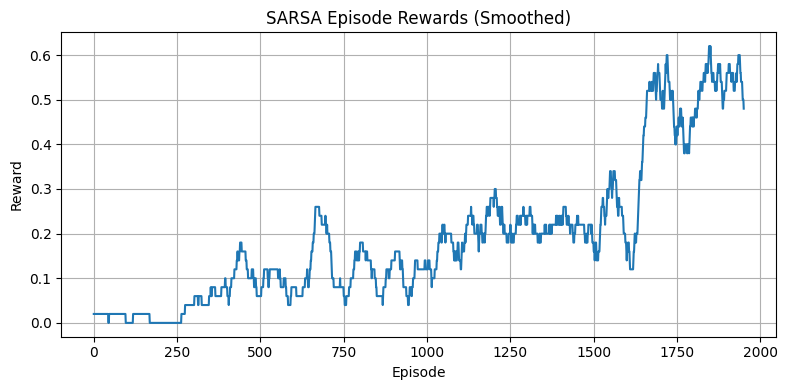

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))
plt.title("SARSA Episode Rewards (Smoothed)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.tight_layout()
plt.show()



Settings: alpha=0.1, gamma=0.9, episodes=1000
Mean Episode Reward: 0.0000

Settings: alpha=0.5, gamma=0.9, episodes=1000
Mean Episode Reward: 0.0440

Settings: alpha=0.1, gamma=0.99, episodes=1000
Mean Episode Reward: 0.0000

Settings: alpha=0.5, gamma=0.99, episodes=2000
Mean Episode Reward: 0.4055


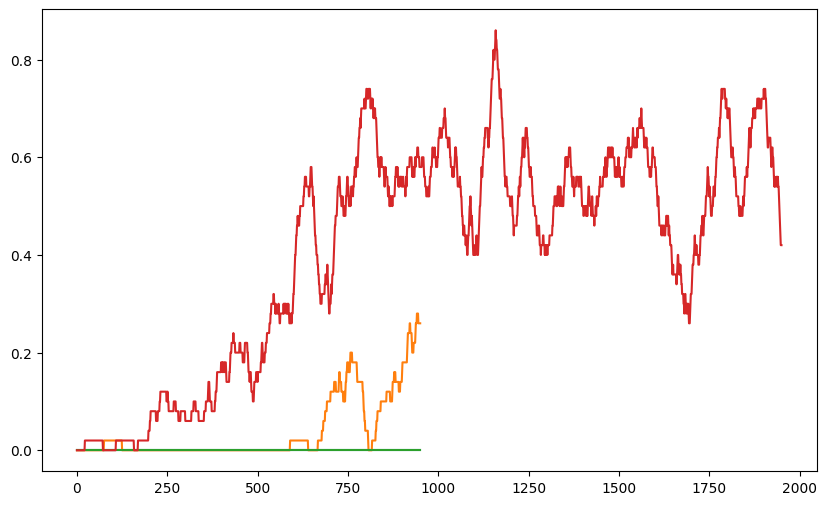

In [5]:
settings = [
    (0.1, 0.9, 1000),
    (0.5, 0.9, 1000),
    (0.1, 0.99, 1000),
    (0.5, 0.99, 2000)
]

plt.figure(figsize=(10, 6))
for alpha, gamma, episodes in settings:
    Q, rewards = sarsa(env, alpha=alpha, gamma=gamma, episodes=episodes)
    label = f"α={alpha}, γ={gamma}, ep={episodes}"
    smoothed = np.convolve(rewards, np.ones(50)/50, mode='valid')
    plt.plot(smoothed, label=label)
    print(f"\nSettings: alpha={alpha}, gamma={gamma}, episodes={episodes}")
    print(f"Mean Episode Reward: {np.mean(rewards):.4f}")

#Conclusion

The SARSA algorithm was applied to the FrozenLake-v1 environment to observe its performance under different hyperparameter settings. The results showed that the learning rate (α), discount factor (γ), and number of episodes all significantly impacted the agent's ability to learn and maximize rewards. Higher discount factors (γ = 0.99) generally improved performance by encouraging the agent to prioritize future rewards. Additionally, varying the learning rate affected the stability of the learning process, with smaller rates offering smoother convergence. The agent's rewards improved over time, reflecting its ability to navigate the environment effectively. Overall, the experiments emphasized the importance of hyperparameter tuning in optimizing reinforcement learning performance.